## import libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## import dataset

In [4]:
df = pd.read_csv('titanic_clean.csv', sep = ',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   FirstName    888 non-null    object 
 4   LastName     888 non-null    object 
 5   Sex          888 non-null    object 
 6   Age          888 non-null    float64
 7   SibSp        888 non-null    float64
 8   Parch        888 non-null    float64
 9   Ticket       888 non-null    object 
 10  Fare         888 non-null    float64
 11  Embarked     888 non-null    object 
 12  Ship         888 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 90.3+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ship
0,1,0,3,Owen Harris,Braund,Male,22.0,1.0,0.0,A/5 21171,7.25,S,Titanic
1,2,1,1,John Bradley (Florence Briggs Thayer),Cumings,Female,38.0,1.0,0.0,PC 17599,14.45,C,Titanic
2,3,1,3,Laina,Heikkinen,Female,26.0,0.0,0.0,STON/O2. 3101282,7.92,S,Titanic
3,4,1,1,Jacques Heath (Lily May Peel),Futrelle,Female,35.0,1.0,0.0,113803,53.10,S,Titanic
4,5,0,3,William Henry,Allen,Male,35.0,0.0,0.0,373450,8.05,S,Titanic


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.0,888.000000
mean,447.238739,0.382883,2.309685,28.456081,0.297297,0.0,17.206791
std,257.528189,0.486364,0.834594,9.796480,0.521806,0.0,12.465003
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.0,0.000000
25%,224.750000,0.000000,2.000000,23.750000,0.000000,0.0,7.915000
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.0,14.450000
75%,669.250000,1.000000,3.000000,33.000000,1.000000,0.0,24.000000
max,1000.000000,1.000000,3.000000,54.000000,2.000000,0.0,63.360000


## Insight

### PClass

#### Which class is the most popular by passengers?

<AxesSubplot:title={'center':'Percentage of Passenger Based on Class'}, ylabel='PassengerId'>

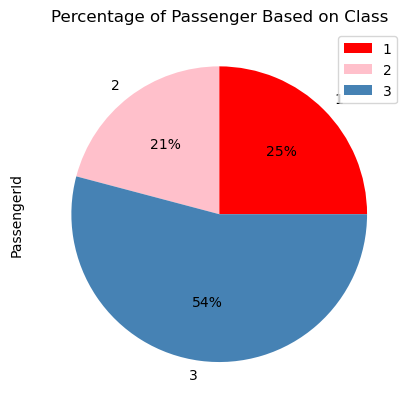

In [70]:
df.groupby(['Pclass']).sum().plot(kind='pie', y='PassengerId', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentage of Passenger Based on Class')

We can learned from pie chart above that most passengers were on the third class that around 54%.

### Survived

<AxesSubplot:title={'center':'Percentage of Passengers based on Survival'}, ylabel='PassengerId'>

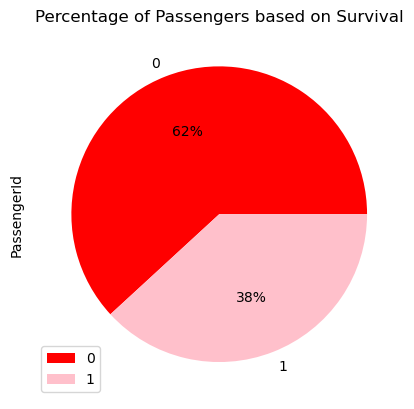

In [71]:
df.groupby(['Survived']).sum().plot(kind='pie', y='PassengerId', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentage of Passengers based on Survival')

<AxesSubplot:xlabel='Survived', ylabel='count'>

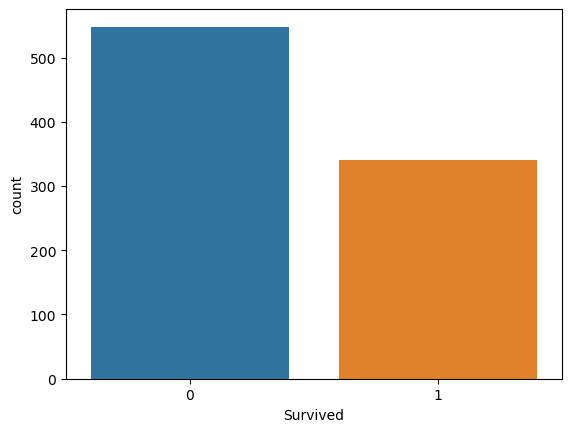

In [28]:
sns.countplot(x='Survived',data=df)

From graphics above, we learned that most passengers did not survived on the titanic tragedy.

### Survived based on gender
#### How many survived passengers based on genders?


<AxesSubplot:xlabel='Survived', ylabel='count'>

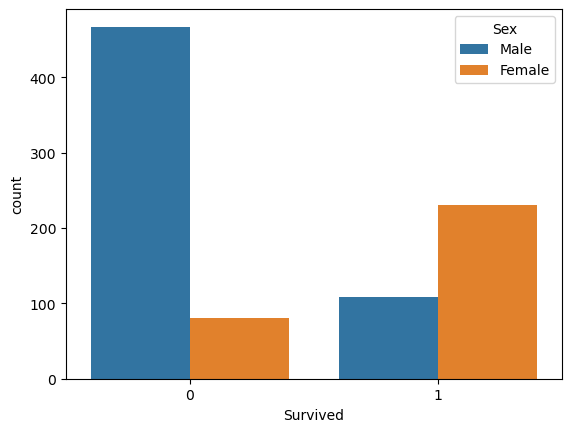

In [6]:
sns.countplot(data=df, x ="Survived", hue="Sex")


Based on graphics above, the number of survived passengers are lesser than not survived which the most are the male passengers, that has almost 500 passsengers. On other hands, the female passengers has more numbers who are survived.



### Survived based on Pclass 

#### How many survived passengers based on the passengers' class?

<AxesSubplot:xlabel='Survived', ylabel='count'>

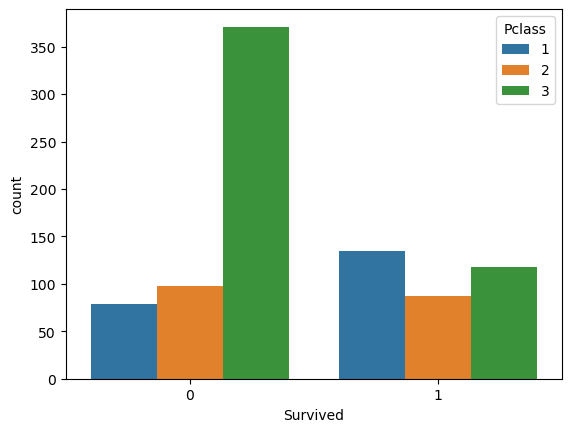

In [8]:
sns.countplot(data=df, x ="Survived", hue="Pclass")

Based on graphic, we can depict that most passengers that did not survived were from third class, it was more than 350 passengers. Therefore, the most survived passengers are from first class.

it was likely, the first class had more privelege to be evacuated first.

## Age

#### What is the age range of the passengers?

<AxesSubplot:ylabel='Frequency'>

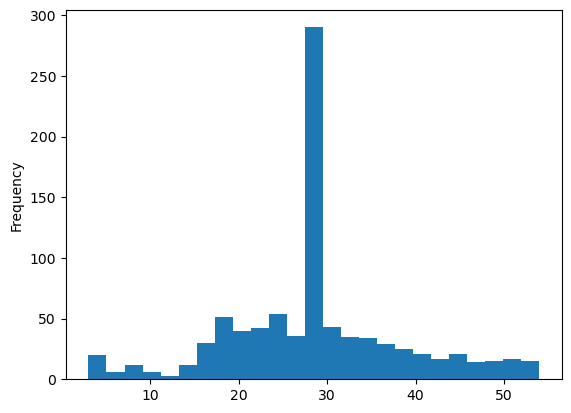

In [9]:
df['Age'].plot.hist(bins=25)

Based on the graphics, it seems the age range of the most passengers on titanic were 28-30 years.

#### what is the range of age based on the passengers' class?

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

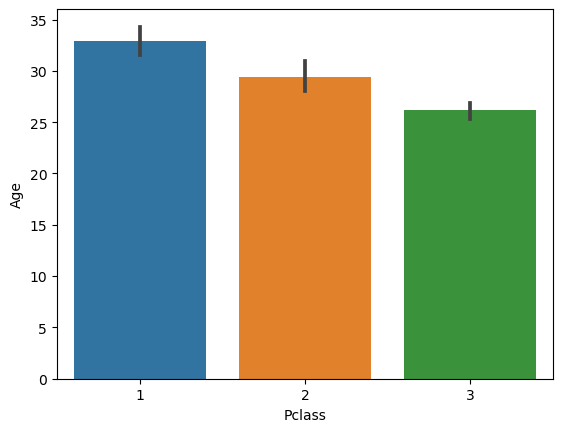

In [10]:
sns.barplot(data=df, x="Pclass", y="Age")

Based on the barplot above, the most passengers that were in first class were the people in their thirties, whereas the second and third class were the twenties. 

In [12]:
#plot = sns.distplot(df['SibSp'],color='purple')

In [13]:
#sns.catplot(data=df, x="SibSp", color="Green")

### SibSp

#### Are there many passengers who brought their families?

<AxesSubplot:xlabel='SibSp', ylabel='count'>

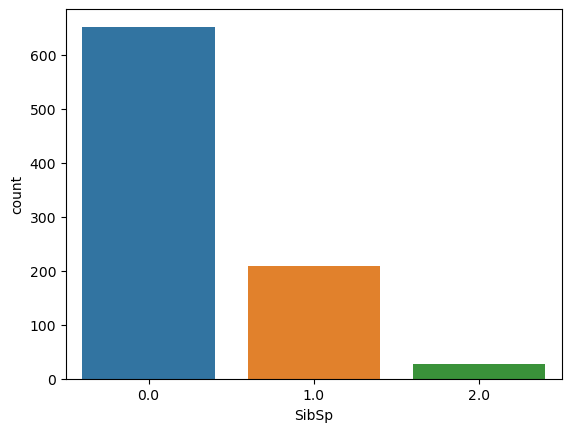

In [67]:
sns.countplot(x='SibSp',data=df)

We can see there were huge numbers of passengers who did not bring their families.

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

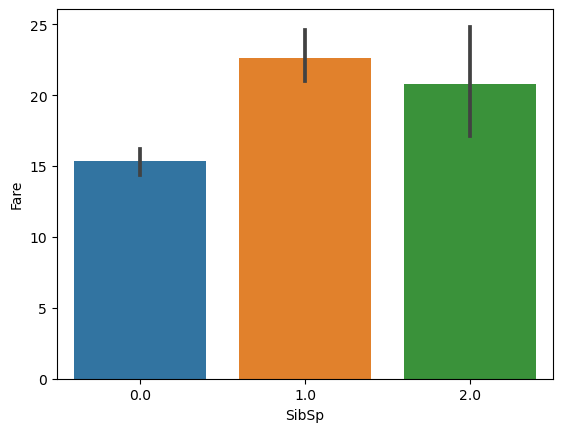

In [66]:
sns.barplot(data=df, x="SibSp", y="Fare")

### Fare

<AxesSubplot:>

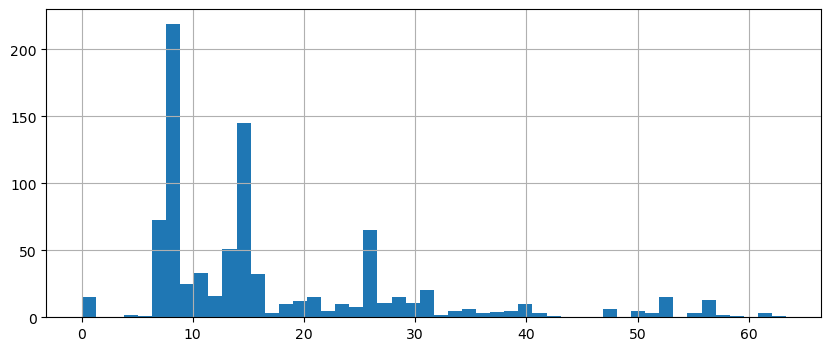

In [20]:
df['Fare'].hist(bins=50,figsize=(10,4))

Mostly the passengers had the cheapest fare that probably were in third class.

#### What the most port that passengers got departed from?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

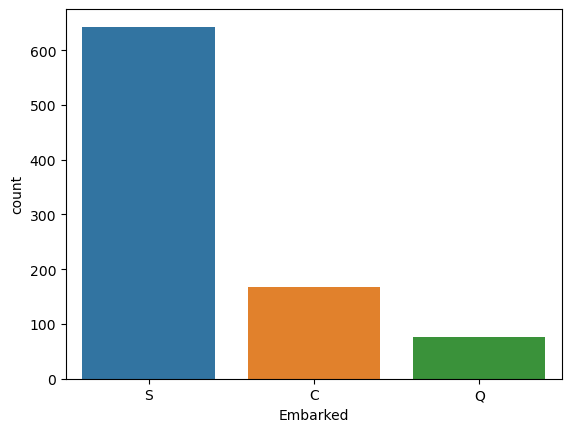

In [23]:
sns.countplot(x='Embarked',data=df)

based on graphic, we can said that most passengers departed from Southampton.

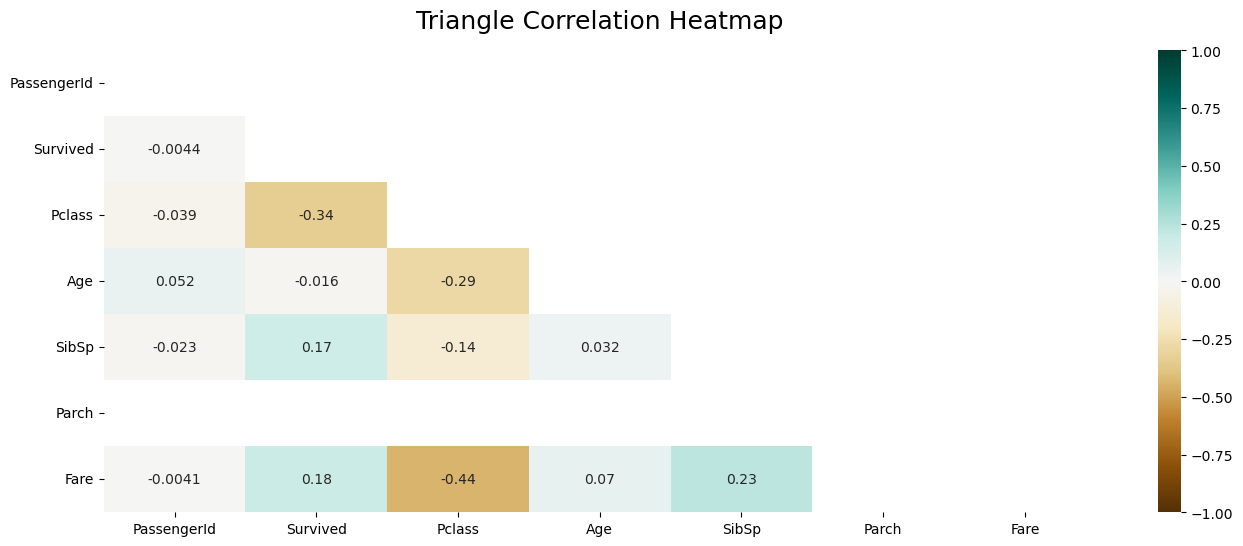

In [63]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);